In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm

plt.rcParams['font.size'] = 30

## Задание 1.

In [36]:
data1 = {
        'converted': [2200, 2000],
        'total':     [10000, 10000],
        'rate':      [2200/10000, 2000/10000]
        }

df1 = pd.DataFrame(data1, index=['A','B'])

df1

,converted,total,rate
A,2200,10000,0.22
B,2000,10000,0.20


In [37]:
n_A = df1['total']['A']
n_B = df1['total']['B']

pA_hat = df1['rate']['A']
pB_hat = df1['rate']['B']
p_hat = (df1['converted']['A'] + df1['converted']['B']) / (df1['total']['A'] + df1['total']['B'])

In [38]:
# null hypothesis: d = pB - pA = 0 
mu_0 = 0
std_0 = np.sqrt(p_hat * (1 - p_hat) / (n_A + n_B))
# alternative hypothesis: d = pB - pA = pB_hat - pA_hat
mu_1 = pB_hat - pA_hat
std_1 = np.sqrt(pA_hat * (1 - pA_hat) / n_A + pB_hat * (1 - pB_hat) / n_B)

In [39]:
def ab_plot_left_sided(alpha=0.05, show_alpha=False, show_beta=False, show_sign=False, show_power=False):
    plt.style.use('ggplot')
    x_0 = np.linspace(mu_0 - 5 * std_0, mu_0 + 5 * std_0, 1000)
    y_0 = norm(mu_0, std_0).pdf(x_0)
    
    x_1 = np.linspace(mu_1 - 5 * std_1, mu_1 + 5 * std_1, 1000)
    y_1 = norm(mu_1, std_1).pdf(x_1)
    
    t_alpha = -std_0 * norm.ppf(1 - alpha)
    beta = 1 - norm(mu_1, std_1).cdf(t_alpha)
    
    fig, ax = plt.subplots(figsize=(16,6))
    ax.plot(x_0, y_0, label='null')
    ax.plot(x_1, y_1, label='alternative')
    
    ax.axvline(x=mu_0, c='red', alpha=0.5, linestyle='--')
    ax.axvline(x=mu_1, c='blue', alpha=0.5, linestyle='--')
    
    ax.axvline(x=t_alpha, c='grey', alpha=0.5, linestyle='--')
    
    if show_alpha:
        ax.fill_between(x_0, y_0, where=x_0 < t_alpha, color='red', alpha=0.2, label='alpha')
    
    if show_beta:
        ax.fill_between(x_1, y_1, where=x_1 > t_alpha, color='blue', alpha=0.2, label='beta')
        
    ax.legend()
    
    print(f'alpha = {alpha:.3f}, beta  = {beta:.3f}, power = {(1 - beta):.3f}')

alpha = 0.010, beta  = 0.010, power = 0.990


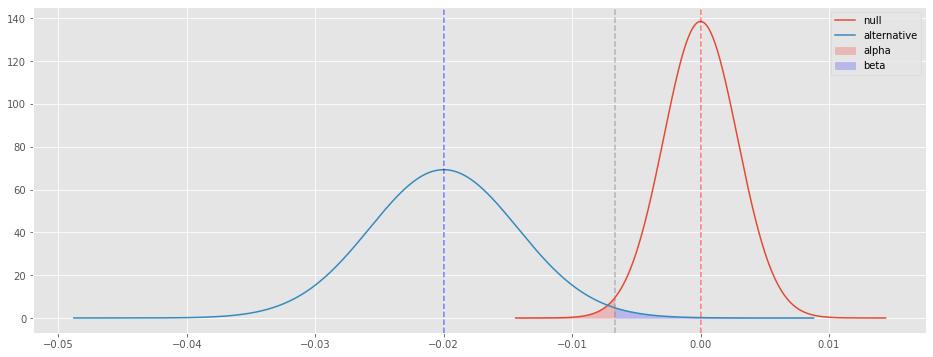

In [40]:
ab_plot_left_sided(alpha=0.01, show_alpha=True, show_beta=True)

## Задание 2.

In [41]:
data2 = {
        'converted': [2070, 2000],
        'total':     [10000, 10000],
        'rate':      [2070/10000, 2000/10000]
        }

df2 = pd.DataFrame(data2, index=['A','B'])

df2

,converted,total,rate
A,2070,10000,0.207
B,2000,10000,0.200


In [42]:
n_A = df2['total']['A']
n_B = df2['total']['B']

pA_hat = df2['rate']['A']
pB_hat = df2['rate']['B']
p_hat = (df2['converted']['A'] + df2['converted']['B']) / (df2['total']['A'] + df2['total']['B'])

In [43]:
# null hypothesis: d = pB - pA = 0 
mu_0 = 0
std_0 = np.sqrt(p_hat * (1 - p_hat) / (n_A + n_B))
# alternative hypothesis: d = pB - pA = pB_hat - pA_hat
mu_1 = pB_hat - pA_hat
std_1 = np.sqrt(pA_hat * (1 - pA_hat) / n_A + pB_hat * (1 - pB_hat) / n_B)

alpha = 0.010, beta  = 0.474, power = 0.526


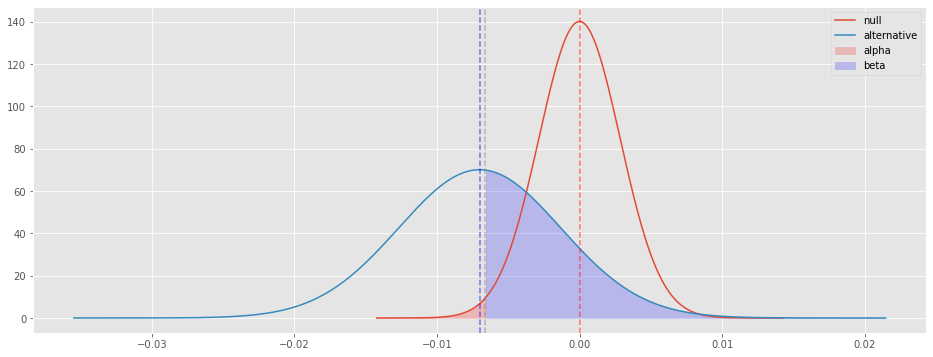

In [44]:
ab_plot_left_sided(alpha=0.01, show_alpha=True, show_beta=True)

## Задание 3.

In [51]:
data3 = {
        'converted': [50, 65],
        'total':     [100, 100],
        'rate':      [50/100, 65/100]
        }

df3 = pd.DataFrame(data3, index=['A','B'])

df3

,converted,total,rate
A,50,100,0.50
B,65,100,0.65


In [52]:
n_A = df3['total']['A']
n_B = df3['total']['B']

pA_hat = df3['rate']['A']
pB_hat = df3['rate']['B']
p_hat = (df3['converted']['A'] + df3['converted']['B']) / (df3['total']['A'] + df3['total']['B'])

In [54]:
# null hypothesis: d = pB - pA = 0 
mu_0 = 0
std_0 = np.sqrt(p_hat * (1 - p_hat) / (n_A + n_B))
# alternative hypothesis: d = pB - pA = pB_hat - pA_hat
mu_1 = pB_hat - pA_hat

In [59]:
def ab_two_sided_sign(alpha=0.05, show_alpha=False, show_beta=False, show_sign=False, show_power=False):
    plt.style.use('ggplot')
    x_0 = np.linspace(mu_0 - 5 * std_0, mu_0 + 5 * std_0, 1000)
    y_0 = norm(mu_0, std_0).pdf(x_0)
    
    t_alpha = std_0 * norm.ppf(1 - alpha / 2)
    
    fig, ax = plt.subplots(figsize=(16,6))
    ax.plot(x_0, y_0, label='null')
    
    ax.axvline(x=mu_0, c='red', alpha=0.5, linestyle='--')
    ax.axvline(x=mu_1, c='blue', alpha=0.5, linestyle='--')
    
    ax.axvline(x=t_alpha, c='grey', alpha=0.5, linestyle='--')
    ax.axvline(x=-t_alpha, c='grey', alpha=0.5, linestyle='--')
    
    if show_alpha:
        ax.fill_between(x_0, y_0, where=x_0 > t_alpha, color='red', alpha=0.2, label='alpha')
        ax.fill_between(x_0, y_0, where=x_0 < -t_alpha, color='red', alpha=0.2, label='alpha')
        
    ax.legend()
    
    print(f'alpha = {alpha:.3f}')

alpha = 0.050


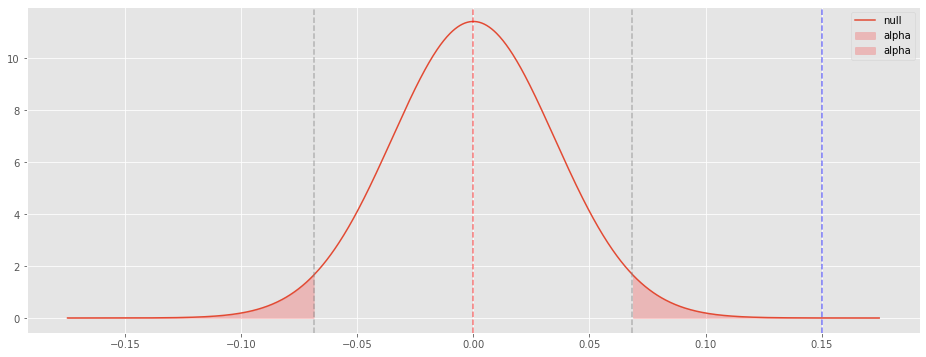

In [60]:
ab_two_sided_sign(alpha=0.05, show_alpha=True, show_beta=True)

alpha = 0.010


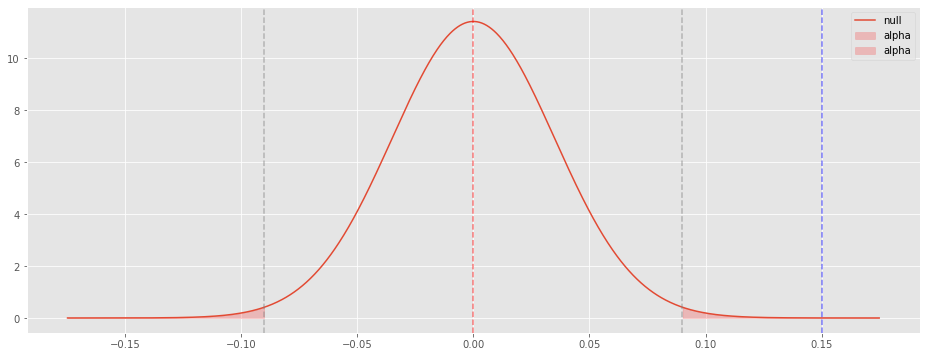

In [61]:
ab_two_sided_sign(alpha=0.01, show_alpha=True, show_beta=True)

## Задание 5.

In [72]:
data5 = {
        'converted': [500, 600],
        'total':     [1000, 1000],
        'rate':      [500/1000, 600/1000]
        }

df5 = pd.DataFrame(data5, index=['A','B'])

df5

,converted,total,rate
A,500,1000,0.5
B,600,1000,0.6


In [73]:
n_A = df5['total']['A']
n_B = df5['total']['B']

pA_hat = df5['rate']['A']
pB_hat = df5['rate']['B']
p_hat = (df5['converted']['A'] + df5['converted']['B']) / (df5['total']['A'] + df5['total']['B'])

In [75]:
# null hypothesis: d = pB - pA = 0 
mu_0 = 0
std_0 = np.sqrt(p_hat * (1 - p_hat) / (n_A + n_B))
# alternative hypothesis: d = pB - pA = pB_hat - pA_hat
mu_1 = pB_hat - pA_hat
std_1 = np.sqrt(pA_hat * (1 - pA_hat) / n_A + pB_hat * (1 - pB_hat) / n_B)

In [76]:
def ab_plot_right_sided(alpha=0.05, show_alpha=False, show_beta=False, show_sign=False, show_power=False):
    plt.style.use('ggplot')
    x_0 = np.linspace(mu_0 - 5 * std_0, mu_0 + 5 * std_0, 1000)
    y_0 = norm(mu_0, std_0).pdf(x_0)
    
    x_1 = np.linspace(mu_1 - 5 * std_1, mu_1 + 5 * std_1, 1000)
    y_1 = norm(mu_1, std_1).pdf(x_1)
    
    t_alpha = mu_0 + std_0 * norm.ppf(1 - alpha)
    beta = norm(mu_1, std_1).cdf(t_alpha)
    power = 1 - beta
    
    fig, ax = plt.subplots(figsize=(16,6))
    ax.plot(x_0, y_0, label='null')
    ax.plot(x_1, y_1, label='alternative')
    
    ax.axvline(x=mu_0, c='red', alpha=0.5, linestyle='--')
    ax.axvline(x=mu_1, c='blue', alpha=0.5, linestyle='--')
    
    ax.axvline(x=t_alpha, c='grey', alpha=0.5, linestyle='--')
    
    if show_alpha:
        ax.fill_between(x_0, y_0, where=x_0 > t_alpha, color='red', alpha=0.2, label='alpha')
    
    if show_beta:
        ax.fill_between(x_1, y_1, where=x_1 < t_alpha, color='blue', alpha=0.2, label='beta')
        
    ax.legend()
    
    print(f'alpha = {alpha:.3f}, beta  = {beta:.3f}, power = {power:.3f}')

alpha = 0.010, beta  = 0.000, power = 1.000


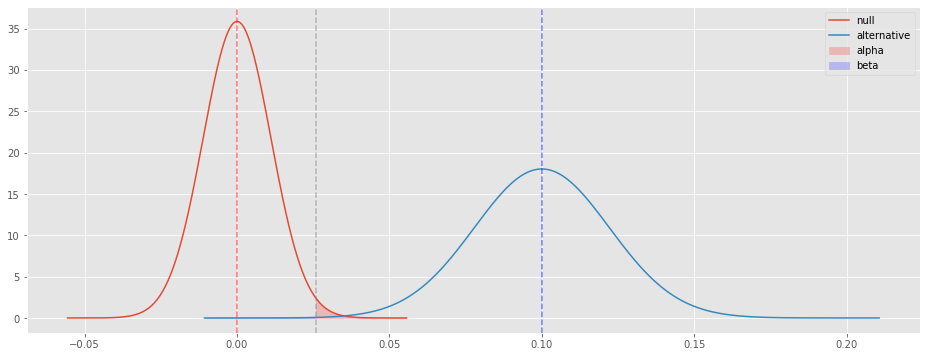

In [77]:
ab_plot_right_sided(alpha=0.01, show_alpha=True, show_beta=True)